# Inv. Kin. mittels CCD (Cyclic Coordinate Descent) lösen 

##  Ein Bspl. in 2D

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

PI = 3.1415926535

In [2]:
# HTM matrix functions
def DH4x4(T,A,a,d):
    H = np.array([[1.0,0.0,0.0,0.0],[0.0,1.0,0.0,0.0],[0.0,0.0,1.0,0.0],[0.0,0.0,0.0,1.0]])   
    H[0,0] =  math.cos(T)
    H[0,1] = -math.sin(T)*math.cos(A)
    H[0,2] =  math.sin(T)*math.sin(A)
    H[0,3] =  a*math.cos(T)
    H[1,0] =  math.sin(T)
    H[1,1] =  math.cos(T)*math.cos(A)
    H[1,2] = -math.cos(T)*math.sin(A)
    H[1,3] =  a*math.sin(T)
    H[2,0] = 0
    H[2,1] = math.sin(A)
    H[2,2] = math.cos(A)
    H[2,3] = d
    return H

def plot4x4Mat(m):
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[0,0],m[0,1],m[0,2],m[0,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[1,0],m[1,1],m[1,2],m[1,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[2,0],m[2,1],m[2,2],m[2,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[3,0],m[3,1],m[3,2],m[3,3]))
    return

def plot3DVec(m):
    print("[%6.2f]"%(m[0,0]))
    print("[%6.2f]"%(m[1,0]))
    print("[%6.2f]"%(m[2,0]))
    return

def pos4x4HTM(m):
    r = np.array([[m[0,3]],[m[1,3]],[m[2,3]]])
    return r

def VecD3ToD2(m):
    r = np.array([[m[0,0]],[m[1,0]]])
    return r

def VecD4ToD3(m):
    r = np.array([[m[0,0]],[m[1,0]],[m[2,0]]])
    return r

In [3]:
# CCD functions

    
def skalar(a,b):
    l = (float(a[0,0])*float(b[0,0])) + (float(a[1,0])*float(b[1,0])) + (float(a[2,0])*float(b[2,0]))
    return float(l);

def betrag(a):
    l = (float(a[0,0])*float(a[0,0])) + (float(a[1,0])*float(a[1,0])) + (float(a[2,0])*float(a[2,0]))
    return float(math.sqrt(l))

def winkel(a,b):
    angle = skalar(a,b)/(betrag(a)*betrag(b))
    return float(math.acos(angle))
    
def kreuz(a,b):
    r = np.array([[0],[0],[0]])
    r[0,0] =  ( float(a[1,0])*float(b[2,0]) ) - ( float(a[2,0])*float(b[1,0]) )
    r[1,0] =  ( float(a[2,0])*float(b[0,0]) ) - ( float(a[0,0])*float(b[2,0]) ) 
    r[2,0] =  ( float(a[0,0])*float(b[1,0]) ) - ( float(a[1,0])*float(b[0,0]) )
    return r

In [4]:
#robot 2D
a1 = 3.0
a2 = 2.0
phi0 = 0.0
phi1 = 0.0

In [5]:
T_1_0 = DH4x4(phi0+(PI/2),0.0,a1,0.0)
T_2_1 = DH4x4(phi1,0.0,a2,0.0)
T_2_0 = T_1_0 @ T_2_1

In [6]:
print("T_1_0 = ",end="\n\n"); plot4x4Mat(T_1_0)
print("T_2_1 = ",end="\n\n"); plot4x4Mat(T_2_1)
print("T_2_0 = ",end="\n\n"); plot4x4Mat(T_2_0)

T_1_0 = 

[  0.00	 -1.00	  0.00	  0.00]
[  1.00	  0.00	 -0.00	  3.00]
[  0.00	  0.00	  1.00	  0.00]
[  0.00	  0.00	  0.00	  1.00]
T_2_1 = 

[  1.00	 -0.00	  0.00	  2.00]
[  0.00	  1.00	 -0.00	  0.00]
[  0.00	  0.00	  1.00	  0.00]
[  0.00	  0.00	  0.00	  1.00]
T_2_0 = 

[  0.00	 -1.00	  0.00	  0.00]
[  1.00	  0.00	  0.00	  5.00]
[  0.00	  0.00	  1.00	  0.00]
[  0.00	  0.00	  0.00	  1.00]


In [7]:
x = 3.0
y = 2.0
z = 0.0
TCP_GOAL = np.array([[x],[y],[z],[1]])

In [8]:
print("TCP_GOAL = ",end="\n\n"); plot3DVec(TCP_GOAL)

TCP_GOAL = 

[  3.00]
[  2.00]
[  0.00]


In [9]:
TCP_CURR = pos4x4HTM(T_2_0)
J1 = pos4x4HTM(T_1_0)
J0 = np.array([[0],[0],[0]])

In [10]:
print("TCP_CURR = ",end="\n\n"); plot3DVec(TCP_CURR)
print("J1 = ",end="\n\n"); plot3DVec(J1)
print("J0 = ",end="\n\n"); plot3DVec(J0)

TCP_CURR = 

[  0.00]
[  5.00]
[  0.00]
J1 = 

[  0.00]
[  3.00]
[  0.00]
J0 = 

[  0.00]
[  0.00]
[  0.00]


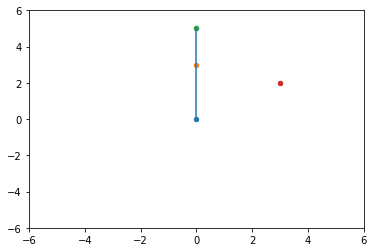

In [11]:
plt.xlim(-6, 6)
plt.ylim(-6, 6)

x = [J0[0,0],J1[0,0],TCP_CURR[0,0]]
y = [J0[1,0],J1[1,0],TCP_CURR[1,0]]

plt.scatter( J0[0,0],J0[1,0], s = 20 )
plt.scatter( J1[0,0],J1[1,0], s = 20 )
plt.scatter( TCP_CURR[0,0],TCP_CURR[1,0], s = 20 )
plt.scatter( TCP_GOAL[0,0],TCP_GOAL[1,0], s = 20 )
plt.plot(x,y);

plt.show()

In [12]:
# J1 update
G1 =VecD4ToD3(TCP_GOAL) - pos4x4HTM(T_1_0) 
P1 = pos4x4HTM(T_2_0) - pos4x4HTM(T_1_0) 
deltaJ1 = winkel(G1,P1)
kreuzJ1 = kreuz(G1,P1)
if kreuzJ1[2,0] < 0.0:
    deltaJ1 = 0.0 - deltaJ1

In [13]:
#robot 2D new state
a1 = a1
a2 = a2
phi1 = phi1 - deltaJ1
phi0 = phi0 

In [14]:
T_1_0 = DH4x4(phi0+(PI/2),0,a1,0)
T_2_1 = DH4x4(phi1,0,a2,0)
T_2_0 = T_1_0 @ T_2_1

In [15]:
TCP_CURR = pos4x4HTM(T_2_0)
J2 = pos4x4HTM(T_1_0)
J1 = np.array([[0],[0],[0]])

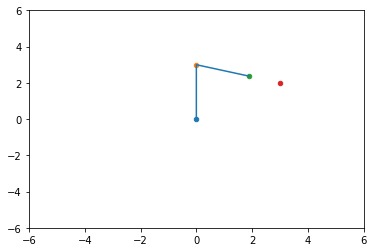

In [16]:
plt.xlim(-6, 6)
plt.ylim(-6, 6)

x = [J1[0,0],J2[0,0],TCP_CURR[0,0]]
y = [J1[1,0],J2[1,0],TCP_CURR[1,0]]

plt.scatter( J1[0,0],J1[1,0], s = 20 )
plt.scatter( J2[0,0],J2[1,0], s = 20 )
plt.scatter( TCP_CURR[0,0],TCP_CURR[1,0], s = 20 )
plt.scatter( TCP_GOAL[0,0],TCP_GOAL[1,0], s = 20 )
plt.plot(x,y);

plt.show()

In [17]:
# J0 update
G0 =VecD4ToD3(TCP_GOAL)
P0 = pos4x4HTM(T_2_0) 
deltaJ0 = float(winkel(G0,P0))
kreuzJ0 = kreuz(G0,P0)
if kreuzJ0[2,0] < 0.0:
    deltaJ0 = 0.0 - deltaJ0

In [18]:
#robot 2D new state
a1 = a1
a2 = a2
phi1 = phi1 
phi0 = phi0 - deltaJ0

In [19]:
T_1_0 = DH4x4(phi0+(PI/2),0,a1,0)
T_2_1 = DH4x4(phi1,0,a2,0)
T_2_0 = T_1_0 @ T_2_1

In [20]:
TCP_CURR = pos4x4HTM(T_2_0)
J2 = pos4x4HTM(T_1_0)
J1 = np.array([[0],[0],[0]])

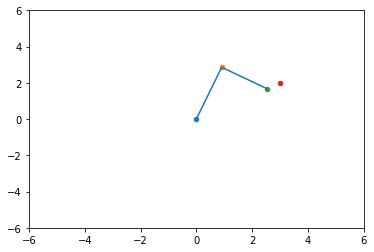

In [21]:
plt.xlim(-6, 6)
plt.ylim(-6, 6)

x = [J1[0,0],J2[0,0],TCP_CURR[0,0]]
y = [J1[1,0],J2[1,0],TCP_CURR[1,0]]

plt.scatter( J1[0,0],J1[1,0], s = 20 )
plt.scatter( J2[0,0],J2[1,0], s = 20 )
plt.scatter( TCP_CURR[0,0],TCP_CURR[1,0], s = 20 )
plt.scatter( TCP_GOAL[0,0],TCP_GOAL[1,0], s = 20 )
plt.plot(x,y);

plt.show()

In [22]:
# J1 update
G1 =VecD4ToD3(TCP_GOAL) - pos4x4HTM(T_1_0) 
P1 = pos4x4HTM(T_2_0) - pos4x4HTM(T_1_0) 
deltaJ1 = winkel(G1,P1)
kreuzJ1 = kreuz(G1,P1)
if kreuzJ1[2,0] < 0.0:
    deltaJ1 = 0.0 - deltaJ1

In [23]:
#robot 2D new state
a1 = a1
a2 = a2
phi1 = phi1 - deltaJ1
phi0 = phi0 


In [24]:
T_1_0 = DH4x4(phi0+(PI/2),0,a1,0)
T_2_1 = DH4x4(phi1,0,a2,0)
T_2_0 = T_1_0 @ T_2_1

In [25]:
TCP_CURR = pos4x4HTM(T_2_0)
J2 = pos4x4HTM(T_1_0)
J1 = np.array([[0],[0],[0]])

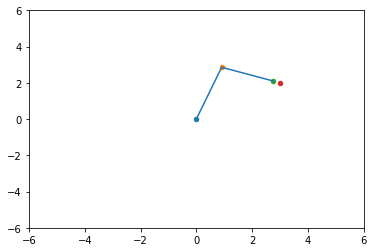

In [26]:
plt.xlim(-6, 6)
plt.ylim(-6, 6)

x = [J1[0,0],J2[0,0],TCP_CURR[0,0]]
y = [J1[1,0],J2[1,0],TCP_CURR[1,0]]

plt.scatter( J1[0,0],J1[1,0], s = 20 )
plt.scatter( J2[0,0],J2[1,0], s = 20 )
plt.scatter( TCP_CURR[0,0],TCP_CURR[1,0], s = 20 )
plt.scatter( TCP_GOAL[0,0],TCP_GOAL[1,0], s = 20 )
plt.plot(x,y);

plt.show()

In [27]:
# J0 update
G0 =VecD4ToD3(TCP_GOAL)
P0 = pos4x4HTM(T_2_0) 
deltaJ0 = float(winkel(G0,P0))
kreuzJ0 = kreuz(G0,P0)
if kreuzJ0[2,0] < 0.0:
    deltaJ0 = 0.0 - deltaJ0

In [28]:
#robot 2D new state
a1 = a1
a2 = a2
phi1 = phi1 
phi0 = phi0 - deltaJ0

In [29]:
T_1_0 = DH4x4(phi0+(PI/2),0,a1,0)
T_2_1 = DH4x4(phi1,0,a2,0)
T_2_0 = T_1_0 @ T_2_1

In [30]:
TCP_CURR = pos4x4HTM(T_2_0)
J2 = pos4x4HTM(T_1_0)
J1 = np.array([[0],[0],[0]])

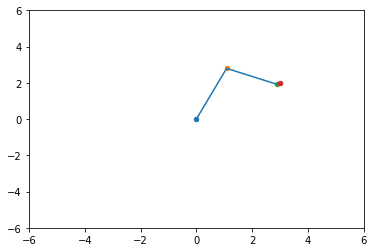

In [31]:
plt.xlim(-6, 6)
plt.ylim(-6, 6)

x = [J1[0,0],J2[0,0],TCP_CURR[0,0]]
y = [J1[1,0],J2[1,0],TCP_CURR[1,0]]

plt.scatter( J1[0,0],J1[1,0], s = 20 )
plt.scatter( J2[0,0],J2[1,0], s = 20 )
plt.scatter( TCP_CURR[0,0],TCP_CURR[1,0], s = 20 )
plt.scatter( TCP_GOAL[0,0],TCP_GOAL[1,0], s = 20 )
plt.plot(x,y);

plt.show()